# Access a Database with Python - Iris Dataset

The Iris dataset is a popular dataset especially in the Machine Learning community, it is a set of features of 50  Iris flowers and their classification into 3 species.
It is often used to introduce classification Machine Learning algorithms.

First let's download the dataset in `SQLite` format from Kaggle:

<https://www.kaggle.com/uciml/iris/>

Download `database.sqlite` and save it in the `data/iris` folder.

<p><img   src="https://upload.wikimedia.org/wikipedia/commons/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg" alt="Iris germanica (Purple bearded Iris), Wakehurst Place, UK - Diliff.jpg" height="145" width="114"></p>

<p><br> From <a href="https://commons.wikimedia.org/wiki/File:Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff.jpg#/media/File:Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff.jpg">Wikimedia</a>, by <a href="//commons.wikimedia.org/wiki/User:Diliff" title="User:Diliff">Diliff</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="http://creativecommons.org/licenses/by-sa/3.0" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=33037509">Link</a></p>

Importing necessary machine learning libraries:

In [59]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.dataset

First let's check that the sqlite database is available and display an error message if the file is not available (`assert` checks if the expression is `True`, otherwise throws `AssertionError` with the error message string provided):

In [60]:
import os
data_iris_folder_content = os.listdir("data/iris")

In [61]:
error_message = "Error: sqlite file not available, check instructions above to download it"
assert "database.sqlite" in data_iris_folder_content, error_message

Assert statements generally help you locate
or identify bugs in your Python programs,
as a way of creating such built-in tests.
If you do a lot of testing,
you'll actually do a lot of assert statements.

## Access the Database with the sqlite3 Package

SQLite
comes with your standard Python,
so it's not a library that you need to go and install
separately,
so it's a pretty easy and nice way
of interacting with a simple database
using simple database queries.
<br><br>
We can use the `sqlite3` package from the Python standard library to connect to the `sqlite` database and do sqlite operations:

In [62]:
import sqlite3

In [63]:
conn = sqlite3.connect('data/iris/database.sqlite')

In [64]:
cursor = conn.cursor()

In [65]:
type(cursor)

sqlite3.Cursor

A `sqlite3.Cursor` object is our interface to the database, mostly throught the `execute` method that allows to run any `SQL` query on our database.

First of all we can get a list of all the tables saved into the database, this is done by reading the column `name` from the `sqlite_master` metadata table with:

    SELECT name FROM sqlite_master
    
The output of the `execute` method is an iterator that can be used in a `for` loop to print the value of each row.

In [66]:
for row in cursor.execute("SELECT name FROM sqlite_master"):
    print(row)

('Iris',)


a shortcut to directly execute the query and gather the results is the `fetchall` method:

In [67]:
cursor.execute("SELECT name FROM sqlite_master").fetchall()

[('Iris',)]

**Notice**: this way of finding the available tables in a database is specific to `sqlite`, other databases like `MySQL` or `PostgreSQL` have different syntax.

Then we can execute standard `SQL` query on the database, `SQL` is a language designed to interact with data stored in a relational database. It has a standard specification, therefore the commands below work on any database.

If you need to connect to another database, you would use another package instead of `sqlite3`, for example:

* [MySQL Connector](https://dev.mysql.com/doc/connector-python/en/) for MySQL
* [Psycopg](http://initd.org/psycopg/docs/install.html) for PostgreSQL
* [pymssql](http://pymssql.org/en/stable/) for Microsoft MS SQL

then you would connect to the database using specific host, port and authentication credentials but then you could execute the same exact `SQL` statements.

Let's take a look for example at the first 3 rows in the Iris table:

In [68]:
sample_data = cursor.execute("SELECT * FROM Iris LIMIT 20").fetchall()

In [69]:
print(type(sample_data))
sample_data

<class 'list'>


[(1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
 (2, 4.9, 3, 1.4, 0.2, 'Iris-setosa'),
 (3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
 (4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
 (5, 5, 3.6, 1.4, 0.2, 'Iris-setosa'),
 (6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
 (7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
 (8, 5, 3.4, 1.5, 0.2, 'Iris-setosa'),
 (9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
 (10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
 (11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
 (12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
 (13, 4.8, 3, 1.4, 0.1, 'Iris-setosa'),
 (14, 4.3, 3, 1.1, 0.1, 'Iris-setosa'),
 (15, 5.8, 4, 1.2, 0.2, 'Iris-setosa'),
 (16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
 (17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
 (18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
 (19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
 (20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa')]

In [70]:
[row[0] for row in cursor.description]

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

It is evident that the interface provided by `sqlite3` is low-level, for data exploration purposes we would like to directly import data into a more user friendly library like `pandas`.

## Import data from a database to `pandas`
<br><br>
We have imported Pandas as pd,
and here to a DataFrame object
called iris_data,
we use the read_sql_query method from Pandas
and we give that a sql_query, a select query,
SELECT star FROM Iris.
Now, you know what that means.
And the connection the object.
So, through this connection token
and the query
Pandas knows
or the read_sql_query function knows
how to get the results of that query
and create a DataFrame for us.
Let's run these.

In [71]:
import pandas as pd

In [72]:
iris_data = pd.read_sql_query("SELECT * FROM Iris", conn)

In [73]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
iris_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

`pandas.read_sql_query` takes a `SQL` query and a connection object and imports the data into a `DataFrame`, also keeping the same data types of the database columns. `pandas` provides a lot of the same functionality of `SQL` with a more user-friendly interface.

However, `sqlite3` is extremely useful for downselecting data **before** importing them in `pandas`.

For example you might have 1 TB of data in a table stored in a database on a server machine. You are interested in working on a subset of the data based on some criterion, unfortunately it would be impossible to first load data into `pandas` and then filter them, therefore we should tell the database to perform the filtering and just load into `pandas` the downsized dataset.
<br><br>
Here for example,
it's the exact same but we are selecting iris_setosa
rather than rather than all three species.
We have a query that says
SELECT star FROM Iris
WHERE species is Iris-setosa.
So, once we execute this,
we'll see that we only have
one species in our resulting DataFrame.

In [75]:
iris_setosa_data = pd.read_sql_query("SELECT * FROM Iris WHERE Species == 'Iris-setosa'", conn)

In [76]:
iris_setosa_data
print(iris_setosa_data.shape)
print(iris_data.shape)


(50, 6)
(150, 6)


In [100]:
iris_data = pd.read_sql_query("SELECT SepalLengthCm, SepalWidthCm, PetalWidthCm, PetalWidthCm FROM Iris", conn)

In [101]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalWidthCm,PetalWidthCm
0,5.1,3.5,0.2,0.2
1,4.9,3.0,0.2,0.2
2,4.7,3.2,0.2,0.2
3,4.6,3.1,0.2,0.2
4,5.0,3.6,0.2,0.2
5,5.4,3.9,0.4,0.4
6,4.6,3.4,0.3,0.3
7,5.0,3.4,0.2,0.2
8,4.4,2.9,0.2,0.2
9,4.9,3.1,0.1,0.1


In [102]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm', 'PetalWidthCm'], dtype='object')

## Machine learning on the iris dataset

- Framed as a **supervised learning** problem: Predict the species of an iris using the measurements
- Famous dataset for machine learning because prediction is **easy**
- Learn more about the iris dataset: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)

# Loading the iris dataset into scikit-learn

In [109]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

In [110]:
# save "bunch" object containing iris dataset and it's attributes
iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [111]:
# print the iris data
print(iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

## Machine learning terminology

- Each row is an **observation** (also known as: sample, example, instance, record)
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate)

In [115]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [117]:
# print integers representing the species of each observation
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [118]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


- Each value we are predicting is the **response** (also known as: target, outcome, label, dependent variable)
- **Classification** is supervised learning in which the response is categorical
- **Regression** is supervised learning in which the response is ordered and continuous

## Requirements for working with data in scikit-learn

First step in ML, is for the model to learn the relationship between the features and the response/target. We will do this part later, but first we need to make sure the features and response are in the form that scikit learn expects. There are four key requirements to keep in mind which are as follows:

1. Features and response are **separate objects**
2. Features and response should be **numeric**
3. Features and response should be **NumPy arrays**
4. Features and response should have **specific shapes**

In [119]:
# check the types of the features and response
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [121]:
# check the shape of the features first (first dimension = number of observations, second dimensions = number of features)
print(iris.data.shape)

(150, 4)


the response object is expected to have a single dimension should have the same magnitude as the first dimension of the feature object. In other words, there should be one response corresponding to each observation.

In [124]:
# check the shape of the response (single dimension matching the number of observations)
print(iris.target.shape)

(150,)


In [125]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

## Resources

- scikit-learn documentation: [Dataset loading utilities](http://scikit-learn.org/stable/datasets/)
- Jake VanderPlas: Fast Numerical Computing with NumPy ([slides](https://speakerdeck.com/jakevdp/losing-your-loops-fast-numerical-computing-with-numpy-pycon-2015), [video](https://www.youtube.com/watch?v=EEUXKG97YRw))
- Scott Shell: [An Introduction to NumPy](http://www.engr.ucsb.edu/~shell/che210d/numpy.pdf) (PDF)

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

### Example training data

![Training data](images/04_knn_dataset.png)

### KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

## scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [133]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [134]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [135]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [136]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [138]:
knn.predict([[3, 5, 4, 2]])

array([2])

it predicted 2, which represents virginica species

- Returns a NumPy array
- Can predict for multiple observations at once

In [141]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

So the model predicted 2 and 1 which is virginica and versicolor

## Using a different value for K
<br><br>
This is known as model tuning. Here we are varying the arguments that we passed to the model. 

In [143]:
# instantiate the model (using the value k-5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

## Using a different classification model

In [149]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response for new observations
logreg.predict(X_new)

array([2, 0])

Which model produced the correct predictions for these two unknown irises? The answer is that we don't know because they are out of sample observations  meaning that we don't know the true response values. 
<br><br>
Our goal in supervised ML is to build models that generalize to new data. However, we often aren't able to truly measure how well our models will perform on out-of-sample data. Does that mean we're forced to just guess how well our models are likely to do? Thankfully no. Later you will see model evaluation procedures which allow us to estimate how well our models are likely to perform on out-of-sample data using our existing labelled data. These procedures will help us to choose which value of K is best for kNN and to choose whether kNN or logistic regression is a better choice for our particular task. 

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)
- [Logistic Regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) (user guide), [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (class documentation)
- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)

## Next Steps

- How do I choose **which model to use** for my supervised learning task?
- How do I choose the **best tuning parameters** for that model?
- How do I estimate the **likely performance of my model** on out-of-sample data?

## Review

- Classification task: Predicting the species of an unknown iris
- Used three classification models: KNN (K=1), KNN (K=5), logistic regression
- Need a way to choose between the models

The goal of supervised learning is always to build a model that generalizes to our sample data and that's what we really need is a procedure that allows us to estimate how well a given model is likely to perform on out-of-sample data. This is known as Model Evaluation Procedures. If we can estimate the likeyl performance of our three models then we can use that performance estimate to choose between the models.

**Solution:** Model evaluation procedures

## Evaluation procedure #1: Train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [150]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## Logisitc Regression

In [151]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [152]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

Classification accuracy:

- **Proportion** of correct predictions
- Common **evaluation metric** for classification problems

first we import the metrics module then we use the accuracy score function and pass it the true response values followed by the predicted response values.

In [153]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


returned 0.96. That means that it compared the 150 true responses/targets with the corresponding 150 predicted responses and calculated that 96% of our predictions were correct. This is known as our training accuracy because we are training the model on the same data we used to train the model. 
- Known as **training accuracy** when you train and test the model on the same data

## KNN (K=5)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.966666666667


0.96666 is slightly better than logisitic regression.

## KNN (K=1)

In [157]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


100% accurate. So we would conclude that KNN (K=1) is the best model to use with this data OR would we draw that conclusion?

However, this doesn't work b/c training and testing your models on the same data is not a useful procedure for deciding whic model to choose. 

### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
    - in other words, models with a high training accuracy may not actually do well when making predictions on out-of-sample data
- Unnecessarily complex models **overfit** the training data
    - models that overfit have learned the noise in the data rather than the signal.
    - in the case of KNN, a very low value of K, creates a high complexity model because it follows the noise in the data. The diagram below expalins overfitting quite well

![Overfitting](images/05_overfitting.png)

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

In [203]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [204]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

the test_size parameter decides the proportion of observations assigned to the testing set. In this case, I've assigned 40% of observations to the testing set which means that 60% will be assigned to the training set. There is no general rule to what percentage is best, but people generarlly use between 20 and 40 of their data for testing. In terms of how the observations are assigned, it's actually a random process. You'll find that if you run this function 5 different times on the same set of data it will split the data 5 different ways. However, if you use an optional parameter called "random_state" and give it an integer value it will split a given data set the same exact way every single time. I'm going to use random_state=4, and my data will be split exactly the same way everytime. 

![Train/test split](images/05_train_test_split.png)

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [205]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [206]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [207]:
# STEP 2: train the model on the training set
logreg = LogisticRegression() # instantiate logisitic regression model
logreg.fit(X_train, y_train) # fit it x train and y train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [208]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual responses response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


### Repeat for KNN with K=5:

In [209]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


### Repeat for KNN with K=1:

In [210]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


### Can we locate an even better value for K?

I've written a for loop to do exactly that in which I try every value of K from 1 through 25 and then record KNN's testing accuracy in this python list called scores. 

In [215]:
# try K=1 through k=25 and record testing accuracy
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0,0.5,'Testing Accuracy')

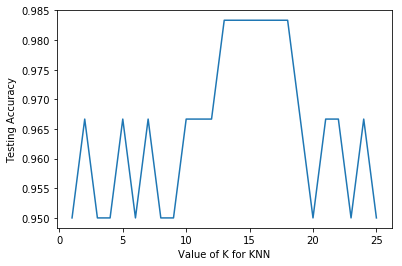

In [214]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

in general, as the value of K increases, there appears to be a rise in the testing accuracy and then a fall. This rise and fall is actually quite typical when examining the relationship between model complexity and testing accuracy. As we talked about earlier, training accuracy rises as model complexicity increases and the model for KNN is deteremined by the value of K. Testing accuracy on the other hand, penalizes models that are too complex and models that aren't complex enough. Therefore, you'll see maximum testing accuracy when the model has the right level of complexity. In this case, we see the highest accuracy from K=6 through K=17 and we would tentatively conclude that K value in that range would be better than K=5. However, b/c this data set is so small and b/c this is such an esasy classification task, it's hard to reliably say whether this behavior we are seeing in this one plot will indeed generalize. Regardless, plotting testing accuracy vs. model complexity is a very useful way to tune any parameters that relate to model complexity. 

- **Training accuracy** rises as model complexity increases
- **Testing accuracy** penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the **value of K** (lower value = more complex)

## Making predictions on out-of-sample data

Once you've chosen a model and it's optimal parameters and are ready to make predictions on out-of-sample data, it's important that you retrain your model on all of the available training data. Otherwise, you'll be throwing away valualble training data. In this case, we will choose the value of 11 for K since that was in the middle of the K range with the highest testing accuracy and we'll call that our best model. Thus, we instantiate the KNN model with n_neighbors=11 and we fit the model with x and y and use the model to make a prediction.

In [225]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[3, 5, 4, 2]])

array([1])

## Downsides of train/test split?

- Provides a **high-variance estimate** of out-of-sample accuracy
    - meaning that it can change a lot depending on which observations happen to be in the training set versus the testing set.
- **K-fold cross-validation** overcomes this limitation by repeating the train_test_split process multiple times in a systematic way and averaging the results. We'll go over that procedure in a future video.
- But, train/test split is still useful because of its **flexibility and speed**

## Resources

- Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)
- Video: [Estimating prediction error](https://www.youtube.com/watch?v=_2ij6eaaSl0&t=2m34s) (12 minutes, starting at 2:34) by Hastie and Tibshirani
- [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html)
    - [Guiding questions](https://github.com/justmarkham/DAT8/blob/master/homework/09_bias_variance.md) when reading this article
- Video: [Visualizing bias and variance](http://work.caltech.edu/library/081.html) (15 minutes) by Abu-Mostafa